In [1]:
import pandas as pd

# Reading all the csv files

In [2]:
books=pd.read_csv('E:\\work\\books recomm\\books.csv')

In [3]:
book_tags=pd.read_csv('E:\\work\\books recomm\\book_tags.csv')

In [4]:
ratings=pd.read_csv('E:\\work\\books recomm\\ratings.csv')

In [5]:
to_read=pd.read_csv('E:\\work\\books recomm\\to_read.csv')

In [9]:
books.head(3)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...


In [7]:
pd.options.display.max_rows=None

In [8]:
pd.options.display.max_columns=None

In [47]:
ratings.head(2)

,book_id,user_id,rating
0,1,314,5
1,1,439,3


In [49]:
ratings.user_id.value_counts().describe()

count    53424.000000
mean        18.376685
std         26.268690
min          2.000000
25%          3.000000
50%          8.000000
75%         22.000000
max        200.000000
Name: user_id, dtype: float64

In [10]:
book_tags.head(2)

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174


In [11]:
books.shape

(10000, 23)

In [12]:
ratings.shape

(981756, 3)

# droping duplicates in books table

In [13]:
books=books.drop_duplicates()

In [14]:
books=books.reset_index(drop=True)

In [10]:
books.head(1)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...


In [11]:
books.shape

(10000, 23)

In [13]:
ratings.shape

(981756, 3)

In [17]:
ratings.book_id.values

array([    1,     1,     1, ..., 10000, 10000, 10000], dtype=int64)

In [18]:
books.book_id.values

array([2767052,       3,   41865, ...,   77431, 8565083,    8914],
      dtype=int64)

In [67]:
ratings.head(1)

,book_id,user_id,rating
0,1,314,5


In [68]:
ratings.shape

(981756, 3)

# dropping duplicates in rating

In [70]:
ratings=ratings.drop_duplicates()

In [71]:
ratings.shape

(980112, 3)

# selecting relevent columns from books table

In [72]:
books1=books[['book_id','title','average_rating','ratings_count']]

In [73]:
books1.head(1)

,book_id,title,average_rating,ratings_count
0,2767052,"The Hunger Games (The Hunger Games, #1)",4.34,4780653


# creating inner join btw books and ratings

In [74]:
code=books1.merge(ratings,on='book_id',how='inner')

In [75]:
code.head()

,book_id,title,average_rating,ratings_count,user_id,rating
0,3,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,314,3
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,588,1
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,2077,2
3,3,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,2487,3
4,3,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,2900,3


In [76]:
code.shape

(79583, 6)

# checking for null values

In [77]:
code.isnull().sum()

book_id           0
title             0
average_rating    0
ratings_count     0
user_id           0
rating            0
dtype: int64

# based on title finding number of ratings

In [78]:
code.groupby('title')['rating'].count().head()

title
'Salem's Lot                                74
'Tis (Frank McCourt, #2)                    99
1421: The Year China Discovered America     98
1776                                       100
1984                                       100
Name: rating, dtype: int64

# based on title finding average ratings

In [79]:
code.groupby('title')['rating'].mean().head()

title
'Salem's Lot                               3.932432
'Tis (Frank McCourt, #2)                   3.959596
1421: The Year China Discovered America    3.734694
1776                                       3.930000
1984                                       3.170000
Name: rating, dtype: float64

In [80]:
code.user_id.value_counts().sort_values(ascending=False).head()

23612    32
11927    32
33065    31
48687    30
19724    30
Name: user_id, dtype: int64

In [81]:
code.user_id.nunique()

28906

In [82]:
code.user_id.value_counts().describe()

count    28906.000000
mean         2.753165
std          2.864741
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         32.000000
Name: user_id, dtype: float64

# finding minimum users value who gave ratings

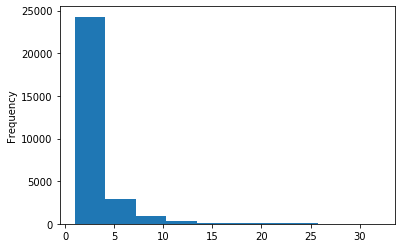

In [83]:
code.user_id.value_counts().plot(kind='hist')

# selecting user_id with count atleast four based on analysis

In [84]:
count1=code.user_id.value_counts()

In [85]:
code=code[code['user_id'].isin(count1[count1>=4].index)]

In [86]:
code.shape

(44681, 6)

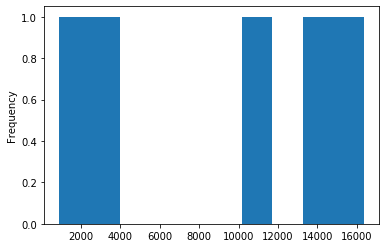

In [87]:
code.rating.value_counts().plot.hist()

In [88]:
code.rating.value_counts().describe()

count        5.000000
mean      8936.200000
std       6726.695898
min        907.000000
25%       2848.000000
50%      11274.000000
75%      13307.000000
max      16345.000000
Name: rating, dtype: float64

#  selecting rating value with count above 10000 on analysis

In [89]:
count=code.rating.value_counts()

In [90]:
code1=code[code['rating'].isin(count[count>=10000].index)]

In [91]:
code1.shape

(40926, 6)

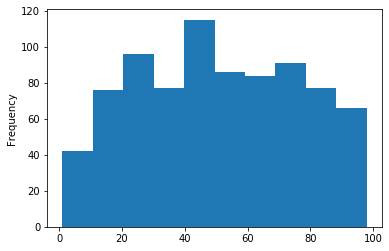

In [92]:
code1.groupby('title')['rating'].count().plot(kind='hist')

In [30]:
import matplotlib.pyplot as plt

In [94]:
code1.head()

,book_id,title,average_rating,ratings_count,user_id,rating
0,3,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,314,3
3,3,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,2487,3
4,3,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,2900,3
5,3,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,3662,4
7,3,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,5115,4


# creating dataframe with title and rating count and average rating

In [95]:
df=pd.DataFrame(code.groupby('title')['rating'].mean())

In [97]:
df['rating_count']=pd.DataFrame(code.groupby('title')['rating'].count())

In [99]:
df=df.reset_index()

In [100]:
df.head()

,title,rating,rating_count
0,'Salem's Lot,4.250000,4
1,"'Tis (Frank McCourt, #2)",3.986111,72
2,1421: The Year China Discovered America,3.743590,78
3,1776,3.939394,99
4,1984,3.204082,49


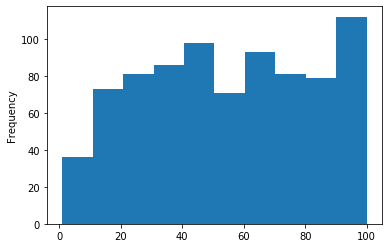

In [101]:
df['rating_count'].plot.hist()

# selecting rows with rating counts above 50

In [102]:
df1=df[df['rating_count']>50]

# creating pivot table btw title and user_id and rating as input 

In [106]:
vector=pd.pivot_table(index='title',columns='user_id',values='rating',data=code1).fillna(0)

In [107]:
vector.head()

user_id                                  7      23     35     49     75     \
title                                                                        
'Salem's Lot                               0.0    0.0    0.0    0.0    0.0   
'Tis (Frank McCourt, #2)                   0.0    0.0    0.0    0.0    0.0   
1421: The Year China Discovered America    0.0    0.0    0.0    0.0    0.0   
1776                                       0.0    0.0    0.0    0.0    0.0   
1984                                       0.0    0.0    0.0    0.0    0.0   

user_id                                  82     143    148    153    158    \
title                                                                        
'Salem's Lot                               0.0    0.0    0.0    0.0    0.0   
'Tis (Frank McCourt, #2)                   0.0    0.0    0.0    0.0    0.0   
1421: The Year China Discovered America    0.0    0.0    0.0    0.0    0.0   
1776                                       0.0    0.0    0.0    0.0    0.0   
1984                                       0.0    0.0    0.0    0.0    0.0   

user_id                                  173    178    202    215    217    \
title                                                                        
'Salem's Lot                               0.0    0.0    0.0    0.0    0.0   
'Tis (Frank McCourt, #2)                   0.0    0.0    0.0    0.0    0.0   
1421: The Year China Discovered America    0.0    0.0    0.0    0.0    0.0   
1776                                       0.0    0.0    0.0    0.0    0.0   
1984                                       0.0    0.0    0.0    0.0    0.0   

user_id                                  218    228    230    244    251    \
title                                                                        
'Salem's Lot                               0.0    0.0    0.0    0.0    0.0   
'Tis (Frank McCourt, #2)                   0.0    0.0    0.0    0.0    0.0   
1421: The Year China Discovered America    0.0    0.0    0.0    0.0    0.0   
1776                                       0.0    0.0    0.0    0.0    0.0   
1984                                       0.0    4.0    0.0    0.0    0.0   

user_id                                  252    274    284    287    289    \
title                                                                        
'Salem's Lot                               0.0    0.0    0.0    0.0    0.0   
'Tis (Frank McCourt, #2)                   0.0    0.0    0.0    0.0    0.0   
1421: The Year China Discovered America    0.0    0.0    0.0    0.0    0.0   
1776                                       0.0    0.0    0.0    0.0    0.0   
1984                                       0.0    0.0    0.0    0.0    0.0   

user_id                                  307    314    319    336    341    \
title                                                                        
'Salem's Lot                               0.0    0.0    0.0    0.0    0.0   
'Tis (Frank McCourt, #2)                   0.0    0.0    0.0    0.0    0.0   
1421: The Year China Discovered America    0.0    0.0    0.0    0.0    0.0   
1776                                       0.0    0.0    0.0    0.0    0.0   
1984                                       0.0    0.0    0.0    0.0    0.0   

user_id                                  343    349    356    363    368    \
title                                                                        
'Salem's Lot                               0.0    0.0    0.0    0.0    0.0   
'Tis (Frank McCourt, #2)                   3.0    0.0    0.0    0.0    0.0   
1421: The Year China Discovered America    0.0    0.0    0.0    0.0    0.0   
1776                                       0.0    0.0    0.0    3.0    0.0   
1984                                       0.0    0.0    0.0    0.0    0.0   

user_id                                  381    407    424    425    430    \
title                                                                        
'Salem's Lot   

# for collaborative recommendations, based on user with similar interests


In [108]:
from scipy.sparse import csr_matrix

In [120]:
rating_matrix=csr_matrix(vector.values)

# finding recommendations based  on cosine similary using NN

In [110]:
from sklearn.neighbors import NearestNeighbors

In [111]:
model=NearestNeighbors(metric='cosine',algorithm='brute')

In [112]:
model.fit(rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

# choosing a random book index

In [123]:
book_index=np.random.choice(vector.shape[0])

In [114]:
import numpy as np

In [128]:
book_index

247

In [129]:
distances,indices=model.kneighbors(vector.iloc[book_index,:].values.reshape(1,-1),n_neighbors=6)

In [130]:
for i in range(len(distances.flatten())):
    if i==0:
        print('Recommendations for {}: '.format(vector.index[book_index]))
    else:
        print(i,vector.index[indices.flatten()[i]])

Recommendations for Here on Earth: 
1 A Christmas Carol and Other Christmas Writings
2 Cradle and All
3 Cause of Death (Kay Scarpetta, #7)
4 Next
5 By the River Piedra I Sat Down and Wept


# Recommendations based on Correlation using user rating

In [145]:
book_vector=pd.pivot_table(index='user_id',columns='title',values='rating',data=code1)

In [146]:
book_vector.head()

title,'Salem's Lot,"'Tis (Frank McCourt, #2)",1421: The Year China Discovered America,1776,1984,A Bend in the River,A Bend in the Road,A Brief History of Time,A Briefer History of Time,A Case of Need,A Christmas Carol,A Christmas Carol and Other Christmas Writings,A Fine Balance,"A Great and Terrible Beauty (Gemma Doyle, #1)",A Heartbreaking Work of Staggering Genius,"A History of God: The 4,000-Year Quest of Judaism, Christianity, and Islam",A History of the World in 6 Glasses,A Home at the End of the World,A House for Mr Biswas,A Lesson Before Dying,A Little Princess,"A Living Nightmare (Cirque Du Freak, #1)",A Man Without a Country,A Map of the World,A Midsummer Night's Dream,A Million Little Pieces,A Modest Proposal and Other Satirical Works,A Moveable Feast,A Painted House,A People's History of the United States,A Portrait of the Artist as a Young Man,A Prayer for Owen Meany,A Raisin in the Sun,A Room with a View,A Separate Peace,A Short History of Nearly Everything,A Son of the Circus,A Spot of Bother,A Supposedly Fun Thing I'll Never Do Again: Essays and Arguments,A Tale of Two Cities,A Virtuous Woman,A Walk in the Woods,A Walk to Remember,A Widow for One Year,A Woman of Substance (Emma Harte Saga #1),About a Boy,"Agamemnon (Oresteia, #1)","Ahab's Wife, or The Star-Gazer",Airframe,All Families are Psychotic,All the King's Men,All the Names,"All-of-a-Kind Family (All-of-a-Kind Family, #1)","Allies of the Night (Cirque du Freak, #8)",America (The Book): A Citizen's Guide to Democracy Inaction,"American Gods (American Gods, #1)",Amsterdam,An Ideal Husband,Anansi Boys,"Angels & Demons (Robert Langdon, #1)",Anil's Ghost,Animal Farm,Animal Farm / 1984,Anne Frank Remembered: The Story of the Woman Who Helped to Hide the Frank Family,Anne Frank: Beyond the Diary - A Photographic Remembrance,"Anne of Green Gables (Anne of Green Gables, #1)",Another Bullshit Night in Suck City,Another Roadside Attraction,Anthem,"Antigone (The Theban Plays, #3)",As the Crow Flies,Assassination Vacation,Atlas Shrugged,Atonement,Awakening the Buddha Within: Tibetan Wisdom for the Western World,Bagombo Snuff Box,Baltasar and Blimunda,Barrel Fever: Stories and Essays,Bel Canto,Beloved,"Betsy-Tacy (Betsy-Tacy, #1)",Birdsong,Black Beauty,Black and Blue,"Bleach, Volume 01","Bleach, Volume 15",Bleachers,"Blind Willow, Sleeping Woman",Blindness,Blink,Blue Like Jazz: Nonreligious Thoughts on Christian Spirituality,Blue Ocean Strategy: How To Create Uncontested Market Space And Make The Competition Irrelevant,Bluebeard,"Book of the Dead (Kay Scarpetta, #15)",Boy: Tales of Childhood,Brave New World,Brave New World / Brave New World Revisited,Brave New World Revisited,Breakfast of Champions,Breaking the Spell: Religion as a Natural Phenomenon,"Breath, Eyes, Memory",Bridge to Terabithia,Brief Interviews with Hideous Men,Brokeback Mountain,Built to Last: Successful Habits of Visionary Companies,Burmese Days,By the River Piedra I Sat Down and Wept,"By the Shores of Silver Lake (Little House, #5)",Cane River,Cannery Row,Carrie / 'Salem's Lot / The Shining,Carter Beats the Devil,"Casino Royale (James Bond, #1)","Cause of Death (Kay Scarpetta, #7)",Chapterhouse: Dune (Dune Chronicles #6),"Charlie and the Chocolate Factory (Charlie Bucket, #1)","Charlie and the Great Glass Elevator (Charlie Bucket, #2)",Children of Dune (Dune Chronicles #3),"City of Glass (The New York Trilogy, #1)","City of the Beasts (Eagle and Jaguar, #1)",Cloudy With a Chance of Meatballs,Code to Zero,Collapse: How Societies Choose to Fail or Succeed,Comfort Me with Apples: More Adventures at the Table,Complete Works of Oscar Wilde,Complications: A Surgeon's Notes on an Imperfect Science,"Confessions of a Shopaholic (Shopaholic, #1)",Confessions of an Economic Hit Man,Congo,Consider the Lobster and Other Essays,Corelli's Mandolin,Cover Her Face (Adam Dalgliesh #1),Cradle and All,Cradle to Cradle: Remaking the Way We Make Things,Crime and Punishment,Crossing to Safety,Crow Lake,"Cry, the Beloved C

In [158]:
book_vector.columns[631]

'The Lord of the Rings (The Lord of the Rings, #1-3)'

# findind recom.. of books LordOfRings and BendInRoad

In [159]:
lordofring=book_vector['The Lord of the Rings (The Lord of the Rings, #1-3)']

In [163]:
bendInRoad=book_vector['A Bend in the Road']

# previously created table based on ratings count

In [157]:
df1.sort_values(by='rating_count',ascending=False).head()

,title,rating,rating_count
631,"The Lord of the Rings (The Lord of the Rings, ...",3.89,100
272,I am Charlotte Simmons,3.98,100
648,The New York Trilogy,3.95,100
646,The Mother Tongue: English and How It Got That...,4.00,100
635,The Lost Continent: Travels in Small Town America,3.44,100


# Correlation of books BendInRoad& LordOfRings with the pivot table

In [161]:
similartoLOR=book_vector.corrwith(lordofring)

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [164]:
similartoBIR=book_vector.corrwith(bendInRoad)

# Recomm. for BendInRoad based on correlation

In [191]:
corrBIR=pd.DataFrame(similartoBIR,columns=['correlation'])

In [200]:
corrBIR=corrBIR.dropna()

,index,title,correlation,rating_count
0,0,A Bend in the Road,1.000000,72
1,1,A Separate Peace,1.000000,78
2,2,A Short History of Nearly Everything,1.000000,99
3,3,"Antigone (The Theban Plays, #3)",0.866025,84
4,4,Brief Interviews with Hideous Men,1.000000,72


In [194]:
df2=df1.reset_index(drop=True)

# Adding the rating count column based on title in CorrBIR

In [ ]:
corrBIR['rating_count']=df2['rating_count']

In [ ]:
corrBIR=corrBIR.reset_index()

In [202]:
corrBIR.head()

,index,title,correlation,rating_count
0,0,A Bend in the Road,1.000000,72
1,1,A Separate Peace,1.000000,78
2,2,A Short History of Nearly Everything,1.000000,99
3,3,"Antigone (The Theban Plays, #3)",0.866025,84
4,4,Brief Interviews with Hideous Men,1.000000,72


# finding top correlated books

In [197]:
corrBIR.sort_values(by='correlation',ascending=False).head()

,index,title,correlation,rating_count
0,0,A Bend in the Road,1.0,72
15,15,Message in a Bottle,1.0,69
2,2,A Short History of Nearly Everything,1.0,99
6,6,Cover Her Face (Adam Dalgliesh #1),1.0,59
1,1,A Separate Peace,1.0,78


# finding recomm. with rating count above 70

In [198]:
corrBIR[corrBIR['rating_count']>70].sort_values('correlation',ascending=False).head()

,index,title,correlation,rating_count
0,0,A Bend in the Road,1.0,72
2,2,A Short History of Nearly Everything,1.0,99
4,4,Brief Interviews with Hideous Men,1.0,72
11,11,In a Sunburned Country,1.0,96
1,1,A Separate Peace,1.0,78


# recomm. books 

In [199]:
corrBIR[corrBIR['rating_count']>70].sort_values('correlation',ascending=False)['title'].head()

0                       A Bend in the Road
2     A Short History of Nearly Everything
4        Brief Interviews with Hideous Men
11                  In a Sunburned Country
1                         A Separate Peace
Name: title, dtype: object